# Investigate a TMDB Movies Data 

<a id='intro'></a>
## Introduction

> In this analysis of tmdb movies data set I will try to answer the below questions
- What is the highest revenue Movies ?
- What is the highest Budged Movies ?
- Which movie get more profit ?
- Analyse all movies runtime
- Which genres are most popular ?
- Most frequent cast
- The profit of the movies over the time
- Number of movies released each year

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns 
%matplotlib inline 

# 1- Data Gathering 

In [2]:
#Importing the Data set 
df_tmdb = pd.read_csv('tmdb-movies.csv')

# 2- Data Assessing

In [3]:
#First I will check the first 5 rows from the data set 
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# let's check if there any missing data and what is the datatype for each coulmn  
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#checking the shape of the data how many rows available
df_tmdb.shape

(10866, 21)

In [6]:
#Checking if there are a duplicated id 
df_tmdb.id.duplicated().sum()

1

In [7]:
# check the duplicated data 
df_tmdb[df_tmdb.id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
#Checking if there are a duplicated imdb_id
df_tmdb.imdb_id.duplicated().sum()

10

In [9]:
# check the duplicated data 
df_tmdb[df_tmdb.imdb_id.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000e+00,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000e+00,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000e+00,0.0
2090,42194,tt0411951,0.596430,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,3.000000e+07,967000.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",...,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000e+00,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,...,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000e+00,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,...,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000e+00,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,...,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,4.680167e+02,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000e+00,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,...,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000e+00,0.0


In [10]:
#Now let's check the insides of the data 
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
#Checking genres Nan Values 
df_tmdb[df_tmdb['genres'].notnull()==False]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
424,363869,tt4835298,0.244648,0,0,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,NaN,Guido Chiesa,NaN,...,"Italian remake of the Mexican 2013 hit, ""We th...",100,NaN,NaN,10/29/15,21,6.1,2015,0.00000,0.0
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,...,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.00000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,...,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.00000,0.0
1712,21634,tt1073510,0.302095,0,0,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,http://www.prayersforbobby.com/,Russell Mulcahy,"Before you echo ""amen"" in your home and place ...",...,"True story of Mary Griffith, gay rights crusad...",88,NaN,Daniel Sladek Entertainment,2/27/09,57,7.4,2009,0.00000,0.0
1897,40534,tt1229827,0.020701,0,0,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,NaN,Bruce Hendricks,NaN,...,Secure your VIP pass to a once-in-a-lifetime e...,76,NaN,NaN,2/27/09,11,7.0,2009,0.00000,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.00000,0.0
2376,315620,tt1672218,0.068411,0,0,Doctor Who: A Christmas Carol,Matt Smith|Karen Gillan|Arthur Darvill|Michael...,NaN,NaN,NaN,...,Amy Pond and Rory Williams are trapped on a cr...,62,NaN,NaN,12/25/10,11,7.7,2010,0.00000,0.0
2853,57892,tt0270053,0.130018,0,0,Vizontele,YÄ±lmaz ErdoÄŸan|Demet Akbag|Altan Erkekli|Cem...,NaN,YÄ±lmaz ErdoÄŸan,NaN,...,The story takes place in a small town (called ...,110,NaN,NaN,2/2/01,12,7.2,2001,0.00000,0.0
3279,54330,tt1720044,0.145331,0,0,ì•„ê¸°ì™€ ë‚˜,Jang Keun-suk|Song Ha-yoon|Kim Jeong-Nan,NaN,Kim Jin-Yeong,NaN,...,Joon-soo (Jang Geun -Seok) is a rebellious hig...,96,NaN,NaN,8/13/08,11,6.1,2008,0.00000,0.0
4547,123024,tt2305700,0.520520,0,0,London 2012 Olympic Opening Ceremony: Isles of...,Queen Elizabeth II|Mike Oldfield|Kenneth Brana...,http://www.london2012.com/,Danny Boyle,Inspire a generation.,...,The London 2012 Olympic Games Opening Ceremony...,220,NaN,BBC,7/27/12,12,8.3,2012,0.00000,0.0


In [12]:
#Checking Cast Nan Values
df_tmdb[df_tmdb['cast'].notnull()==False]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,NaN,Sanjay Patel,NaN,...,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000,0.0
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,http://www.netflix.com/title/80031666,Evgeny Afineevsky,The Next Generation Of Revolution,...,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000,0.0
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,NaN,Adam Curtis,NaN,...,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000,0.0
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,NaN,David Gelb,NaN,...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9677,13926,tt0093832,0.253376,0,0,Red's Dream,NaN,NaN,John Lasseter,NaN,...,Life as the sole sale item in the clearance co...,4,Animation,Pixar Animation Studios,8/17/87,44,6.6,1987,0.000000,0.0
9755,48714,tt0061402,0.046272,0,0,The Big Shave,NaN,NaN,Martin Scorsese,NaN,...,This short film is a metaphor for the Vietnam ...,6,Drama,NaN,1/1/68,12,6.7,1968,0.000000,0.0
10434,48784,tt0060984,0.146906,200,0,Six Men Getting Sick,NaN,NaN,David Lynch,NaN,...,Lynch's first film project consists of a loop ...,4,Animation,Pensylvania Academy of Fine Arts,1/1/67,16,5.2,1967,1307.352748,0.0
10550,13925,tt0091455,0.306425,0,0,Luxo Jr.,NaN,http://www.pixar.com/short_films/Theatrical-Sh...,John Lasseter,NaN,...,A baby lamp finds a ball to play with and it's...,2,Animation|Family,Pixar Animation Studios,8/17/86,81,7.3,1986,0.000000,0.0


In [13]:
# There are some values in budgeds equal to 0 not Nan let's check them 
df_tmdb[df_tmdb['budget']==0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.0,0.000000e+00
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.0,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.0,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.0,0.000000e+00


# 3- Data Cleaning

In [14]:
# before cleaning the data I will copy the data to new data set 
df_tmdb_clean = df_tmdb.copy()

##### Define
- Since the vote_count are diffrent from one movie to another so we can't use it in our analysis so i will drop it 
- drop unwanted coulms (homepage, director, keywords, tagline, overview, production_companies, etc)

##### Code

In [15]:
# Removing not required Columns 
df_tmdb_clean.drop(['homepage','director', 'keywords','tagline','popularity', 'overview', 'production_companies','vote_count', 'vote_average','budget_adj', 'revenue_adj'], axis=1, inplace=True)

##### Test

In [16]:
df_tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10866 non-null  int64 
 1   imdb_id         10856 non-null  object
 2   budget          10866 non-null  int64 
 3   revenue         10866 non-null  int64 
 4   original_title  10866 non-null  object
 5   cast            10790 non-null  object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   release_year    10866 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 849.0+ KB


In [17]:
df_tmdb_clean.head()

,id,imdb_id,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,262500,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,168259,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


##### Define
- Drop imdb_id Nan values 

##### Code

In [18]:
df_tmdb_clean = df_tmdb_clean[df_tmdb_clean['imdb_id'].notna()]

##### Test

In [19]:
df_tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10856 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10856 non-null  int64 
 1   imdb_id         10856 non-null  object
 2   budget          10856 non-null  int64 
 3   revenue         10856 non-null  int64 
 4   original_title  10856 non-null  object
 5   cast            10780 non-null  object
 6   runtime         10856 non-null  int64 
 7   genres          10835 non-null  object
 8   release_date    10856 non-null  object
 9   release_year    10856 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 932.9+ KB


##### Define
- Drop dublicated id and imdb_id

##### Code

In [20]:
# drop imdb_id duplicates
df_tmdb_clean = df_tmdb_clean.drop_duplicates(subset='imdb_id', keep="first")

In [21]:
# drop id duplicates
df_tmdb_clean = df_tmdb_clean.drop_duplicates(subset='id', keep="first")

##### Test

In [22]:
df_tmdb_clean.imdb_id.duplicated().sum()

0

In [23]:
df_tmdb_clean.id.duplicated().sum()

0

In [24]:
df_tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              10855 non-null  int64 
 1   imdb_id         10855 non-null  object
 2   budget          10855 non-null  int64 
 3   revenue         10855 non-null  int64 
 4   original_title  10855 non-null  object
 5   cast            10779 non-null  object
 6   runtime         10855 non-null  int64 
 7   genres          10834 non-null  object
 8   release_date    10855 non-null  object
 9   release_year    10855 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 932.9+ KB


##### Define
- Drop imdb_id coulmn  and id      

##### Code

In [25]:
# Now we can remove the imdb_id and id columns after using them in previous steps 
df_tmdb_clean.drop(['imdb_id','id'], axis=1, inplace=True)

##### Test

In [26]:
df_tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10855 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10855 non-null  int64 
 1   revenue         10855 non-null  int64 
 2   original_title  10855 non-null  object
 3   cast            10779 non-null  object
 4   runtime         10855 non-null  int64 
 5   genres          10834 non-null  object
 6   release_date    10855 non-null  object
 7   release_year    10855 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 763.2+ KB


##### Define
- Drop genres NaN values 

##### Code

In [27]:
df_tmdb_clean = df_tmdb_clean[df_tmdb_clean['genres'].notna()]

##### Test

In [28]:
df_tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10834 non-null  int64 
 1   revenue         10834 non-null  int64 
 2   original_title  10834 non-null  object
 3   cast            10759 non-null  object
 4   runtime         10834 non-null  int64 
 5   genres          10834 non-null  object
 6   release_date    10834 non-null  object
 7   release_year    10834 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 761.8+ KB


In [29]:
df_tmdb_clean.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015


##### Define
- convert release_date to datetime format

##### Code

In [30]:
df_tmdb_clean['release_date'] = pd.to_datetime(df_tmdb_clean['release_date'])

##### Test

In [31]:
df_tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          10834 non-null  int64         
 1   revenue         10834 non-null  int64         
 2   original_title  10834 non-null  object        
 3   cast            10759 non-null  object        
 4   runtime         10834 non-null  int64         
 5   genres          10834 non-null  object        
 6   release_date    10834 non-null  datetime64[ns]
 7   release_year    10834 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 761.8+ KB


In [32]:
df_tmdb_clean.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


##### Define
-  Some values in budget and revenue are zeros so I will replace them with Nan values 

##### Code

In [33]:
df_tmdb_clean['budget'] = df_tmdb_clean['budget'].replace(0, np.NaN)
df_tmdb_clean['revenue'] = df_tmdb_clean['revenue'].replace(0, np.NaN)

##### Test

In [34]:
df_tmdb_clean[df_tmdb_clean['budget']==0]

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year


In [35]:
df_tmdb_clean[df_tmdb_clean['revenue']==0]

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year


##### Define
-  Drop Nan Values of budget and revenue

##### Code

In [36]:
df_tmdb_clean = df_tmdb_clean[df_tmdb_clean['budget'].notna()]
df_tmdb_clean = df_tmdb_clean[df_tmdb_clean['revenue'].notna()]

##### Test

In [37]:
df_tmdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   budget          3854 non-null   float64       
 1   revenue         3854 non-null   float64       
 2   original_title  3854 non-null   object        
 3   cast            3850 non-null   object        
 4   runtime         3854 non-null   int64         
 5   genres          3854 non-null   object        
 6   release_date    3854 non-null   datetime64[ns]
 7   release_year    3854 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 271.0+ KB


In [38]:
df_tmdb_clean.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015


In [39]:
df_tmdb_clean.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


In [40]:
#save data 
df_tmdb_clean.to_csv('df_tmdb_clean.csv', index=False)

# 4- Analyse the Data 

### What is the highest revenue Movies  ?

In [41]:
df_tmdb_clean.sort_values(by ='revenue',ascending=False ).head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year
1386,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,2009
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5231,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,194,Drama|Romance|Thriller,1997-11-18,1997
4361,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,143,Science Fiction|Action|Adventure,2012-04-25,2012
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015


In [42]:
#I will sort the data by the highest 5 revenue movies 
analys_1 =df_tmdb_clean.sort_values(by ='revenue',ascending=False ).head()

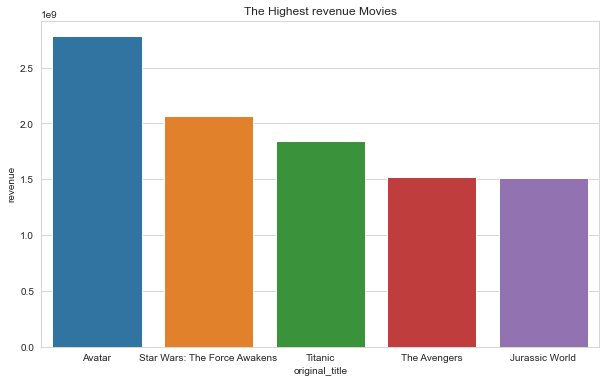

In [43]:
# Using barplot I will show the data 
# Set the bakground style
sns.set_style('whitegrid')
# Set the plot size 
plt.figure(figsize=(10,6))
# Set the title of the plot
plt.title("The Highest revenue Movies")
sns.barplot(x='original_title', y='revenue', data=analys_1);

> **Note** From the above analysis we can see that avatar has the highest revenue  

### What is the highest Budged Movies  ?

In [44]:
#I will sort the data by the highest 5 budged movies 
analys_2 =df_tmdb_clean.sort_values(by ='budget',ascending=False ).head()

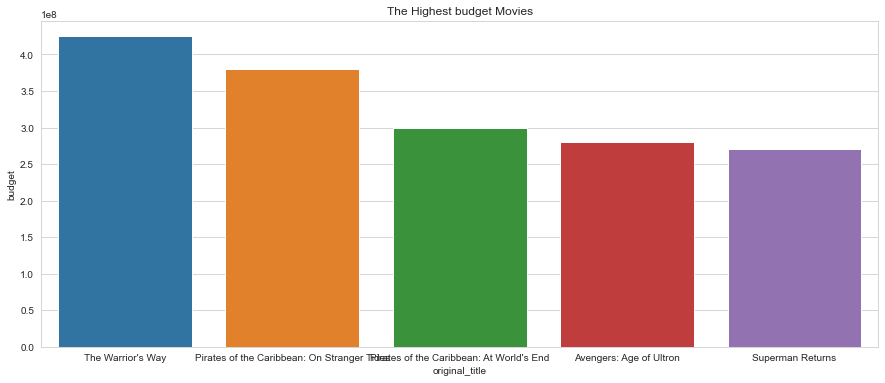

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.title("The Highest budget Movies")
sns.barplot(x='original_title', y='budget', data=analys_2);

> **Note** From the above analysis we can see that The warriors's Way has the highest budget  

### Which movie get more profit ?

In [46]:
# In order to do check this we need to calculate the profit for each movie first (profit = revenue - budget)
df_tmdb_clean['Profit'] = df_tmdb_clean['revenue'] -df_tmdb_clean['budget']

In [47]:
# Cheking the Profit column
df_tmdb_clean.head()

,budget,revenue,original_title,cast,runtime,genres,release_date,release_year,Profit
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,2.284364e+08
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.852382e+08
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.868178e+09
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1.316249e+09


In [48]:
#I will sort the data by the highest 5 profit movies 
analys_3 =df_tmdb_clean.sort_values(by ='Profit',ascending=False ).head()

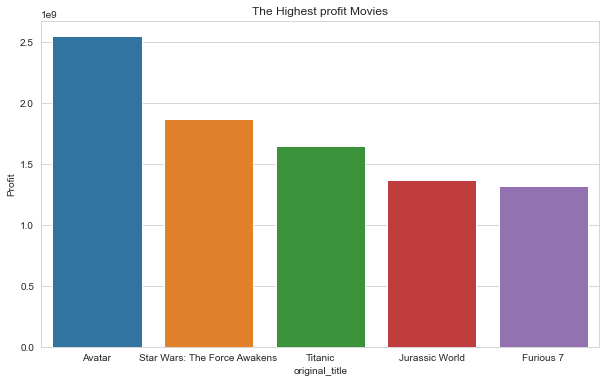

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title("The Highest profit Movies")
sns.barplot(x='original_title', y='Profit', data=analys_3);

> **Note** Avatar has the highest profit as well

### Analyse all movies runtime

In [50]:
# Calculate the mean run time 
df_tmdb_clean['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

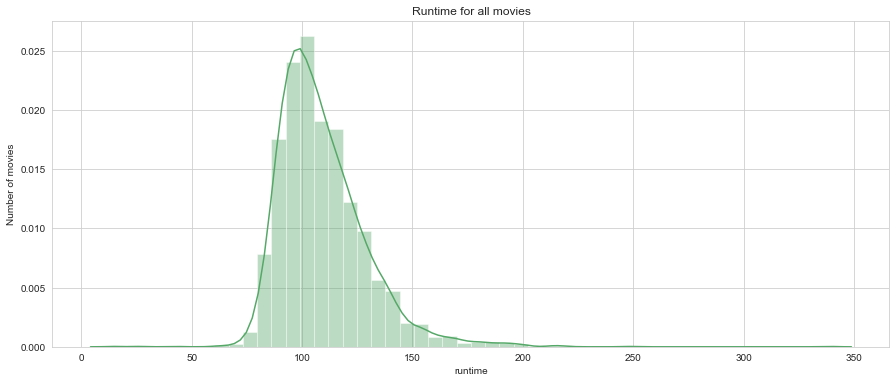

In [51]:
sns.set_style('whitegrid')
sns.set_color_codes()
plt.figure(figsize=(15,6))
plt.title("Runtime for all movies")
plt.ylabel("Number of movies")
sns.distplot(a=df_tmdb_clean['runtime'], label="runtime", kde=True,color="g");

> **Note** the mean runtime is 109 min and 75% of movies are 119 min 

### Which genres are most popular ?

In [52]:
# Here I will create a function in order to use it again 
def counting (coulmn):
    #collecting all the generes and adding them in series then count them
    data= df_tmdb_clean[coulmn].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    #count the values then sorting them 
    data_count = data.value_counts(ascending = False)
    
    return data_count

In [53]:
#I will count all geners in full data set 
# considering only the top ten genres
analys_4 =counting('genres').head(10)

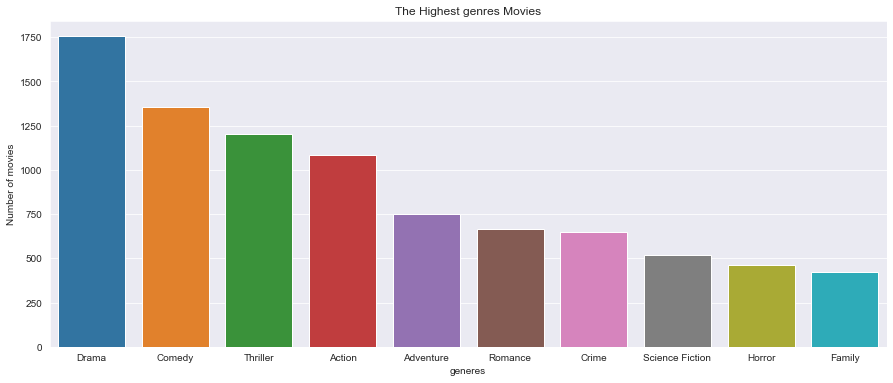

In [54]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.title("The Highest genres Movies")
plt.xlabel("generes")
plt.ylabel("Number of movies")
sns.barplot(analys_4.index, analys_4.values);

> **Note** The highest genres (Drama , Comedy and Thriller)

### Most frequent cast 

In [55]:
# considering only the top ten Cast
analys_5 =counting('cast').head(10)

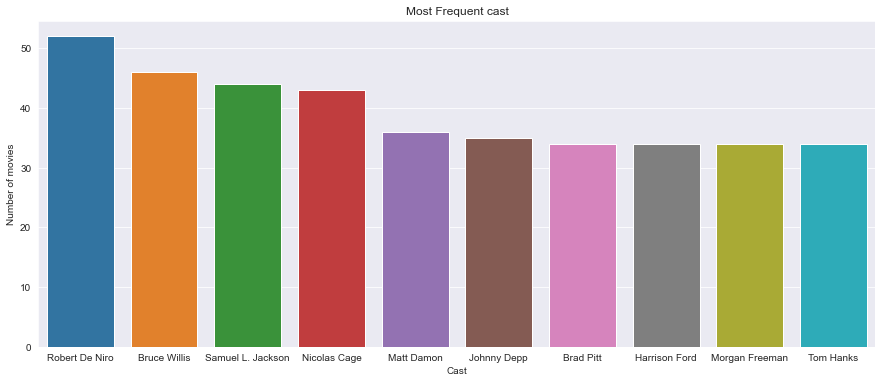

In [56]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.title("Most Frequent cast")
plt.xlabel("Cast")
plt.ylabel("Number of movies")
sns.barplot(analys_5.index, analys_5.values);

> **Note** We can see here that movies by (Robert De Niro, Bruce Wills and Samuel) are the most popular

### The profit of the movies from year to year

In [57]:
# In order to create the plot we need to calculate the total profit for each year
analys_5= df_tmdb_clean.groupby('release_year')['Profit'].sum()

In [58]:
analys_5.head()

release_year
1960    108198052.0
1961    299083188.0
1962    166879846.0
1963    115411882.0
1964    294678387.0
Name: Profit, dtype: float64

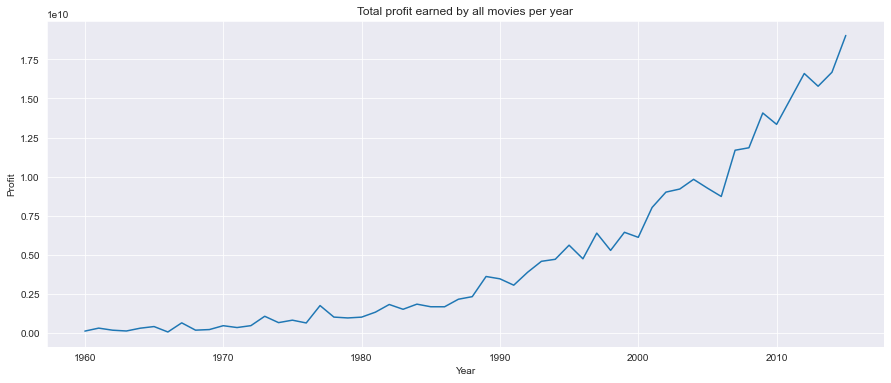

In [59]:
# Draw line plot to show the relation between the profit and year
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.title("Total profit earned by all movies per year")
plt.xlabel("Year")
plt.ylabel("Profit")
sns.lineplot(data=analys_5);

> **Note** From this analysis the profit are increasing each year and from 1990 to 2010 there are a huge increase in profit

### Number of movies released each year

In [60]:
# Same like before lets group the number of movies in each ear
analys_6= df_tmdb_clean.groupby(['release_year']).size()

In [61]:
analys_6.head()

release_year
1960     5
1961    10
1962     7
1963     6
1964     7
dtype: int64

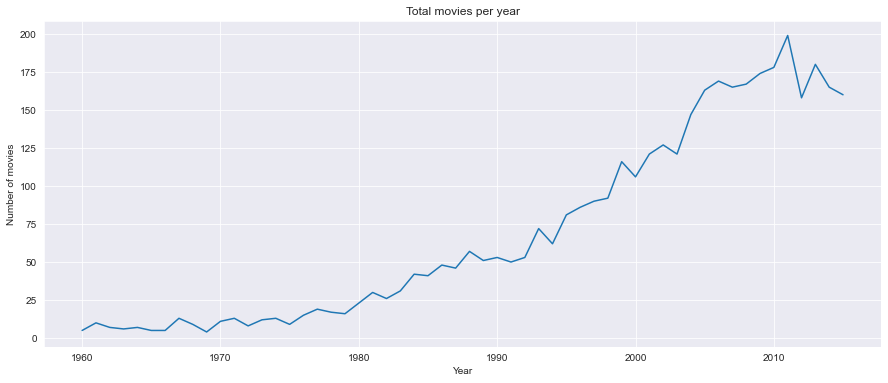

In [62]:
# Draw line plot to show the number of movies per year
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
plt.title("Total movies per year")
plt.xlabel("Year")
plt.ylabel("Number of movies")
sns.lineplot(data=analys_6);

> **Note** Here it's clear that the increse of the profit it's because the number of movies increased

## Conclusions

>  We can summarize my analysis as below 
- Avatar has the highest revenue and profit as well
- The warrior's way has the highest budget
- The average runtime is 109 min but the popular run time is 119
- Drama, Comedy, Thriller movies are the most popular movies 
- Movies by Robert De Niro, Bruce Willis, etc are the most popular movies 

> ### limitation: 
- It will be good if we have an accurate number of voting to calculate the top rating movies based on people likes not only based on profit. Also, there are missing data in revenue and budged columns which maybe if it's there will increase the accuracy of the analysis. Also, we don't have updated data so we can check what happens in the last years. 